In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
df.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [4]:
df.nunique()

x1    1887
x2    1884
y        2
dtype: int64

<AxesSubplot:>

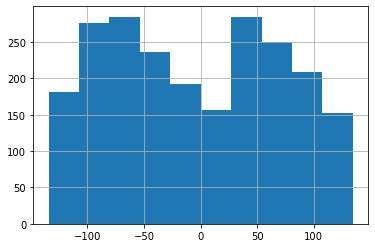

In [5]:
df['x1'].hist()

<AxesSubplot:>

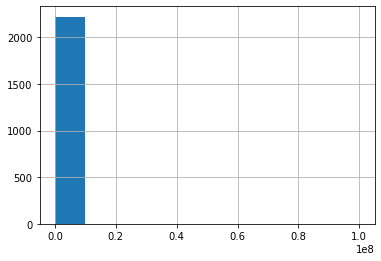

In [6]:
df['x2'].hist()

In [7]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [8]:
df['x1'] = df['x1'].round(decimals=2)

In [9]:
df['x2'] = df['x2'].round(decimals=2)

In [10]:
df

,x1,x2,y
0,-119.37,115.00,1
1,-101.11,97.78,1
2,-130.28,106.77,1
3,-114.70,101.20,1
4,-119.37,115.00,1
...,...,...,...
2222,98.71,89.64,0
2223,96.63,91.00,0
2224,85.67,103.84,0
2225,78.96,78.61,0


<AxesSubplot:xlabel='x1'>

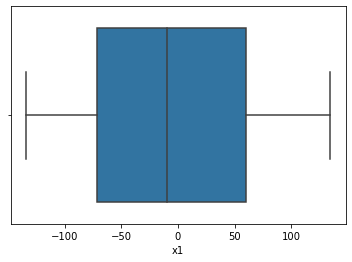

In [11]:
sns.boxplot(x = 'x1', data = df)

<AxesSubplot:xlabel='x2'>

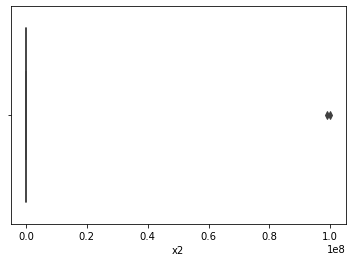

In [12]:
sns.boxplot(x = 'x2', data = df)

In [13]:
df[df['x2']>135]

,x1,x2,y
1541,66.63,99009998.0,0
2226,109.62,99999999.0,0


In [14]:
df.shape

(2227, 3)

In [15]:
df.replace(df['x2'].iloc[1541], 135)
df.replace(df['x2'].iloc[2226], 135)

,x1,x2,y
0,-119.37,115.00,1
1,-101.11,97.78,1
2,-130.28,106.77,1
3,-114.70,101.20,1
4,-119.37,115.00,1
...,...,...,...
2222,98.71,89.64,0
2223,96.63,91.00,0
2224,85.67,103.84,0
2225,78.96,78.61,0


In [16]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

In [18]:
df['x1'].fillna(df['x1'].mean(), inplace = True)
df['x2'].fillna(df['x2'].mean(), inplace = True)

In [19]:
df.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.819694,8.947626e+04,0.442299
std,74.855766,2.981312e+06,0.496771
min,-134.370000,-1.348800e+02,0.000000
25%,-71.585000,-7.997500e+01,0.000000
50%,-9.120000,-1.000000e+00,0.000000
75%,59.630000,6.400500e+01,1.000000
max,134.510000,1.000000e+08,1.000000


In [20]:
X = df.drop('y', axis = 'columns')
Y = df['y']

## Feature Scaling

**Since, data is not normally distributed so I used MinMaxScaler**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaled = scaler.fit_transform(X)

In [24]:
scaled

array([[5.57869682e-02, 2.49879665e-06],
       [1.23698304e-01, 2.32659689e-06],
       [1.52112467e-02, 2.41649676e-06],
       ...,
       [8.18357632e-01, 2.38719680e-06],
       [7.93402261e-01, 2.13489714e-06],
       [9.07430824e-01, 1.00000000e+00]])

In [25]:
scaled_X = pd.DataFrame(scaled, columns = ['x1', 'x2'])

In [26]:
scaled_X.head()

,x1,x2
0,0.055787,0.000002
1,0.123698,0.000002
2,0.015211,0.000002
3,0.073155,0.000002
4,0.055787,0.000002


## Logistics regression

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.2)

In [29]:
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
model.score(X_test, Y_test)

0.5919282511210763

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(model, X_test, Y_test)

array([0.57777778, 0.58426966, 0.58426966, 0.58426966, 0.57303371])

## SVM

In [33]:
from sklearn.svm import SVC

In [34]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(scaled_X, Y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.520485
1,20,linear,0.522274


In [35]:
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, Y_train)

SVC()

In [36]:
cross_val_score(svc1, X_test, Y_test)

array([0.57777778, 0.58426966, 0.58426966, 0.56179775, 0.57303371])

In [37]:
svc2 = SVC(kernel='linear')
svc2.fit(X_train, Y_train)

SVC(kernel='linear')

In [38]:
cross_val_score(svc2, X_test, Y_test)

array([0.57777778, 0.58426966, 0.58426966, 0.58426966, 0.57303371])

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
clf = DecisionTreeClassifier()

In [41]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [42]:
cross_val_score(clf, X_test, Y_test)

array([0.87777778, 0.86516854, 0.91011236, 0.84269663, 0.88764045])

## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_test, Y_test)

KNeighborsClassifier()

In [46]:
cross_val_score(knn, X_test, Y_test)

array([0.51111111, 0.56179775, 0.53932584, 0.49438202, 0.56179775])

# Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ["gini", "entropy"],
            'splitter' : ["best", "random"],
           'max_depth' : [5, 10, 15, 20, 25, 30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN': {
        'model' : KNeighborsClassifier(weights='uniform', algorithm='auto'),
        'params': {
             'n_neighbors' : [2,5,10]
        }
    }
}

In [49]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.579450,"{'C': 20, 'kernel': 'rbf'}"
1,decision_tree,0.954520,"{'criterion': 'entropy', 'max_depth': 20, 'spl..."
2,logistic_regression,0.583945,{'C': 1}
3,KNN,0.559787,{'n_neighbors': 10}


In [50]:
df.loc[1]['best_params']

{'criterion': 'entropy', 'max_depth': 20, 'splitter': 'random'}

**Hence using Grid Search CV, Decision Tree Model is the best model with the above parameters**

<AxesSubplot:xlabel='model', ylabel='best_score'>

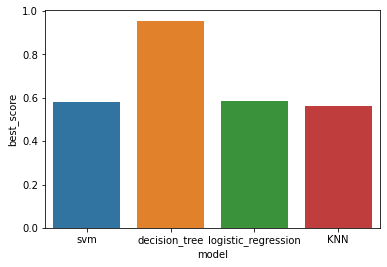

In [52]:
sns.barplot(x = 'model', y = 'best_score', data = df)